<a href="https://colab.research.google.com/github/N34R20/Ciencia-de-Datos-DH/blob/main/An%C3%A1lisis_y_Limpieza_TP_Final_Siniestros_Viales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insatlando e Importando librerias 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install geopandas
%pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import missingno as msn
import seaborn as sns
from datetime import date
import sklearn
import shapely
import calendar

# Temas a resolver:


## Propuestas


importar un calendario para incluir dentro del analisis y hacer comparaciones entre los distintos dias, asi todas las variables temporales las tenemos cubiertas.
ano, mes, dia, hora, q/ dia

# (EDA) Analisis exploratorio de datos


In [ ]:
#path_siniestros = '/content/Victimas_siniestros_2015-2018.csv'
#df = pd.read_csv(path_siniestros)
#path_barrios = '/content/barrios.csv'
#barrios = pd.read_csv(path_barrios, encoding = 'latin1')

In [ ]:
path_siniestros = '/content/drive/MyDrive/Data /Victimas_siniestros_2015-2018.csv'
df = pd.read_csv(path_siniestros)
path_barrios = '/content/drive/MyDrive/Data /barrios.csv'
barrios = pd.read_csv(path_barrios, encoding = 'latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['month'] = df['fecha'].dt.month
df['year'] = df['fecha'].dt.year
df['day'] = df['fecha'].dt.day

In [ ]:
df

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil,2.0,2015.0,14.0
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN,2.0,2015.0,25.0
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico""",2.0,2015.0,27.0
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,2015-03-02,18:30:00,lavalle 1730,...,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN,3.0,2015.0,2.0
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion,4.0,2015.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018,2018-05-31,20:00:00,NaN,...,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",5.0,2018.0,31.0
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018,2018-05-31,9:30:00,NaN,...,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil",5.0,2018.0,31.0
33231,lesiones,NaN,NaN,NaN,NaN,5.0,2018,2018-05-31,9:30:00,NaN,...,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil",5.0,2018.0,31.0
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018,2018-05-31,14:15:00,NaN,...,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil,5.0,2018.0,31.0


In [ ]:
df.columns

Index(['causa', 'rol', 'tipo', 'sexo', 'edad', 'mes', 'periodo', 'fecha',
       'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
       'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2',
       'codigo_calle', 'codigo_cruce', 'geocodificacion', 'semestre', 'x', 'y',
       'geom', 'cantidad_victimas', 'comuna', 'geom_3857', 'tipo_colision1',
       'participantes_victimas', 'participantes_acusados', 'month', 'year',
       'day'],
      dtype='object')

In [ ]:
df.nunique()

causa                               2
rol                                 9
tipo                               24
sexo                                2
edad                              104
mes                                12
periodo                             4
fecha                            1247
hora                             1304
lugar_hecho                     20110
direccion_normalizada           15521
tipo_calle                          3
direccion_normalizada_arcgis    15519
calle1                           1197
altura                           3521
calle2                           1391
codigo_calle                     1033
codigo_cruce                     1215
geocodificacion                 17959
semestre                            2
x                               15600
y                               15584
geom                            16914
cantidad_victimas                  12
comuna                             15
geom_3857                       16550
tipo_colisio

In [ ]:
df.isnull().sum()

causa                               0
rol                               335
tipo                             1100
sexo                              197
edad                              559
mes                                37
periodo                             0
fecha                              61
hora                               17
lugar_hecho                      3716
direccion_normalizada             765
tipo_calle                          0
direccion_normalizada_arcgis      772
calle1                            765
altura                          26123
calle2                           8247
codigo_calle                     9290
codigo_cruce                    12525
geocodificacion                  1095
semestre                            0
x                                1095
y                                1095
geom                             1095
cantidad_victimas                   0
comuna                           1098
geom_3857                        1095
tipo_colisio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   causa                         33234 non-null  object        
 1   rol                           32899 non-null  object        
 2   tipo                          32134 non-null  object        
 3   sexo                          33037 non-null  object        
 4   edad                          32675 non-null  float64       
 5   mes                           33197 non-null  float64       
 6   periodo                       33234 non-null  int64         
 7   fecha                         33173 non-null  datetime64[ns]
 8   hora                          33217 non-null  object        
 9   lugar_hecho                   29518 non-null  object        
 10  direccion_normalizada         32469 non-null  object        
 11  tipo_calle                  

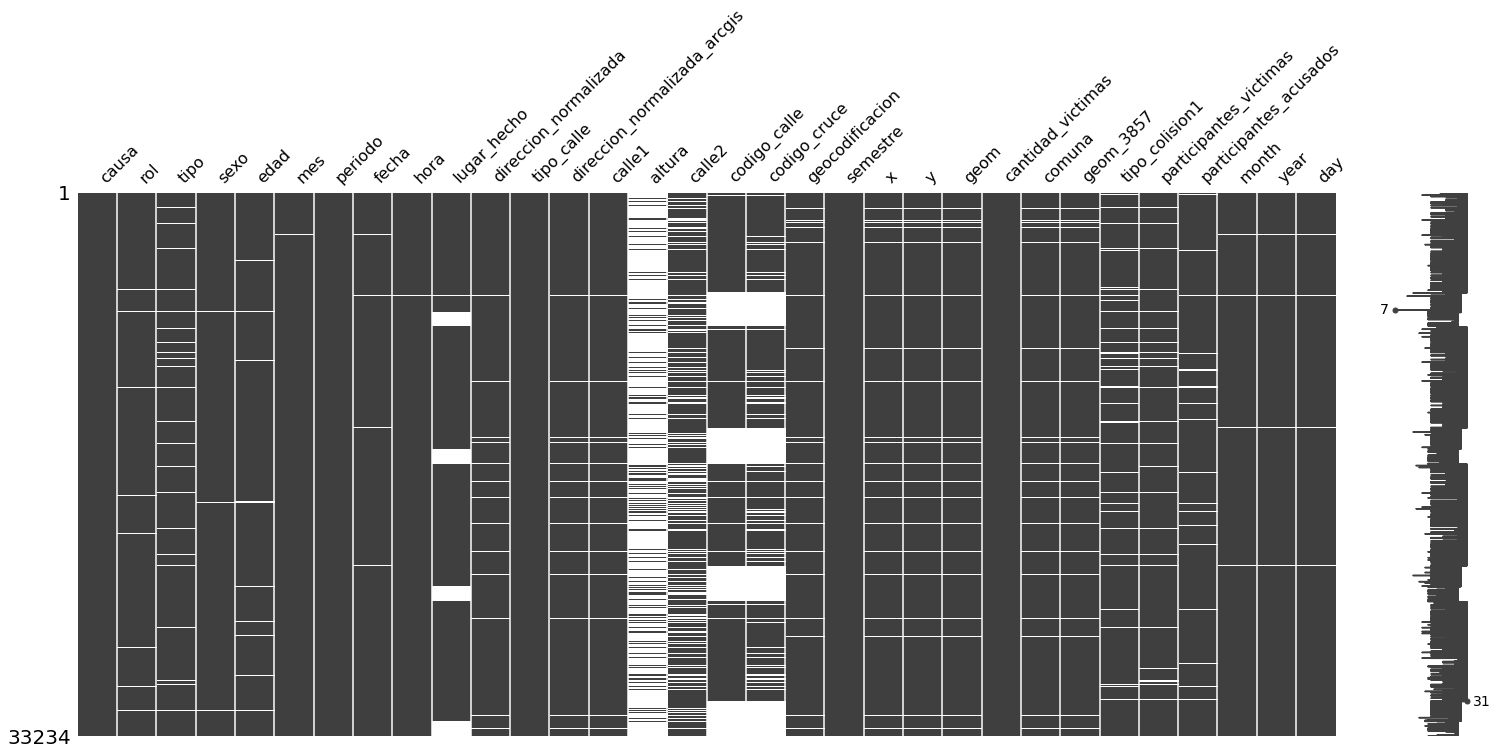

In [ ]:
msn.matrix(df)

# ***Preguntas***




1. Que podemos observar dadas las variables que se nos presentan?

2. comparando las variables categoricas, como pueden interpretarse?

3. Hay caracteristicas distintivas de las victimas pueden observarse?

4. En que lugares de la ciudad ocurren mas accidentes?




# Limpieza de Datos

In [ ]:
# Dropeamos columnas innecesarias o que tienen demasiados pocos datos:
columnas_innecesarias = ['semestre', 'geom', 'geom_3857', 'altura', 'calle1', 'calle2', 'codigo_calle', 'codigo_cruce', 'direccion_normalizada', 'direccion_normalizada_arcgis', 'lugar_hecho', 'mes', 'periodo' ]
df.drop(columnas_innecesarias, axis=1, inplace=True)

In [ ]:
df.isnull().sum()

causa                        0
rol                        335
tipo                      1100
sexo                       197
edad                       559
fecha                       61
hora                        17
tipo_calle                   0
geocodificacion           1095
x                         1095
y                         1095
cantidad_victimas            0
comuna                    1098
tipo_colision1            1343
participantes_victimas    1131
participantes_acusados     677
month                       61
year                        61
day                         61
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   causa                   33234 non-null  object        
 1   rol                     32899 non-null  object        
 2   tipo                    32134 non-null  object        
 3   sexo                    33037 non-null  object        
 4   edad                    32675 non-null  float64       
 5   fecha                   33173 non-null  datetime64[ns]
 6   hora                    33217 non-null  object        
 7   tipo_calle              33234 non-null  object        
 8   geocodificacion         32139 non-null  object        
 9   x                       32139 non-null  float64       
 10  y                       32139 non-null  float64       
 11  cantidad_victimas       33234 non-null  int64         
 12  comuna                  32136 non-null  float6

<function matplotlib.pyplot.savefig>

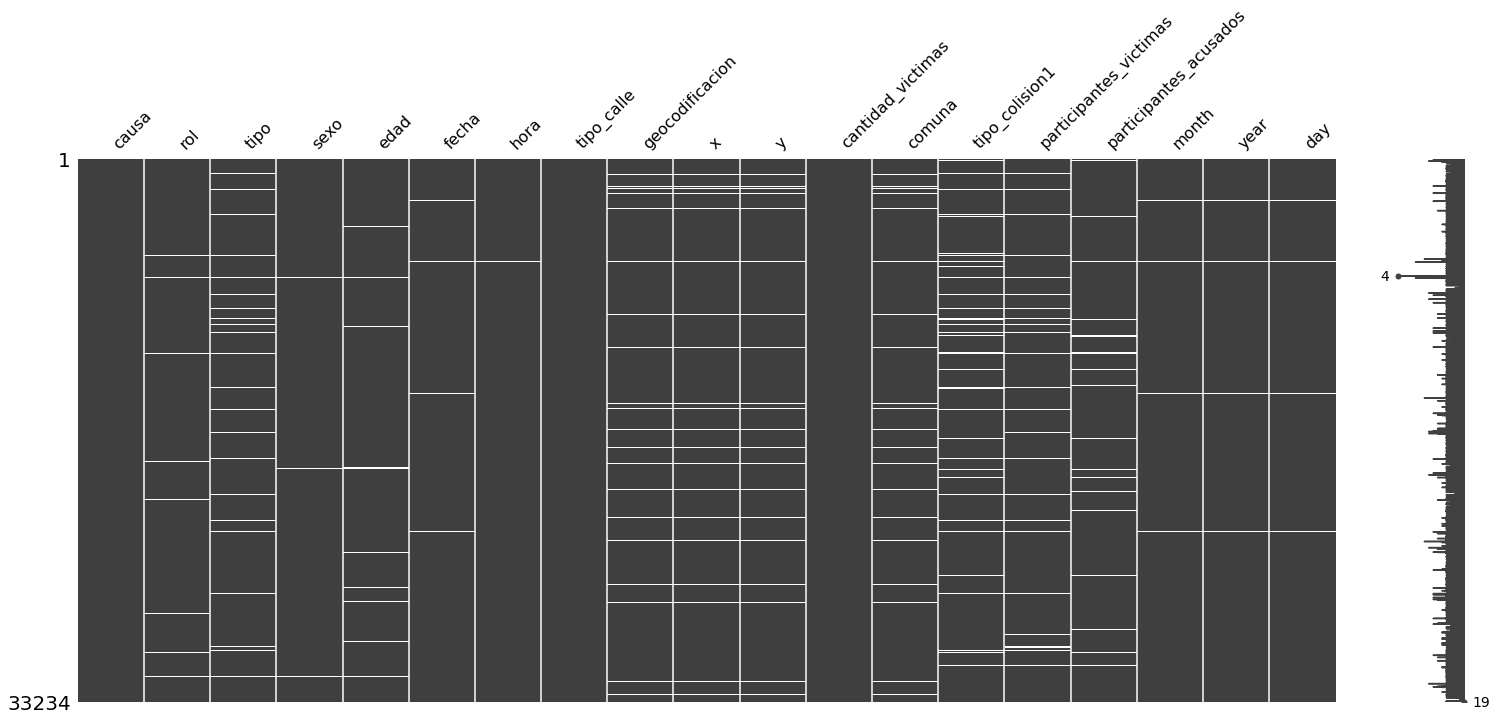

In [ ]:
msn.matrix(df)
plt.savefig

In [ ]:
# Tenemos datos que no tienen coordenadas x e y: como no nos van a servir para representarlos en el mapa de CABA, los dropeamos:
filas_no_deseadas = ['rol', 'x', 'y', 'hora', 'tipo', 'year', 'day', 'month', 'edad', 'sexo', 'tipo_colision1', 'participantes_victimas', 'participantes_acusados']
df.dropna(how='any', subset=filas_no_deseadas, inplace=True)
df.reset_index(drop=True, inplace=True)

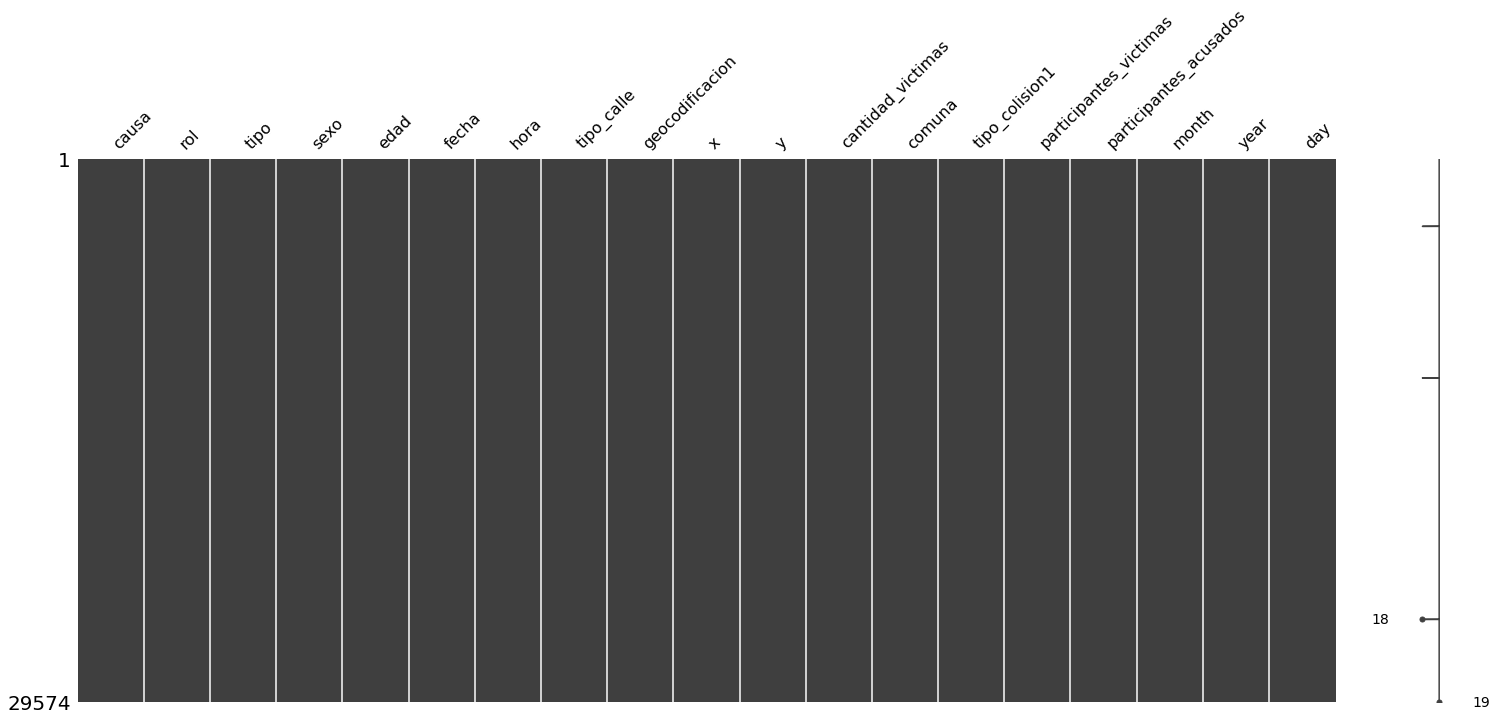

In [ ]:
msn.matrix(df)

In [ ]:
df.isnull().sum()

causa                     0
rol                       0
tipo                      0
sexo                      0
edad                      0
fecha                     0
hora                      0
tipo_calle                0
geocodificacion           0
x                         0
y                         0
cantidad_victimas         0
comuna                    3
tipo_colision1            0
participantes_victimas    0
participantes_acusados    0
month                     0
year                      0
day                       0
dtype: int64

In [ ]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['day'] = df['day'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29574 entries, 0 to 29573
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   causa                   29574 non-null  object        
 1   rol                     29574 non-null  object        
 2   tipo                    29574 non-null  object        
 3   sexo                    29574 non-null  object        
 4   edad                    29574 non-null  float64       
 5   fecha                   29574 non-null  datetime64[ns]
 6   hora                    29574 non-null  object        
 7   tipo_calle              29574 non-null  object        
 8   geocodificacion         29574 non-null  object        
 9   x                       29574 non-null  float64       
 10  y                       29574 non-null  float64       
 11  cantidad_victimas       29574 non-null  int64         
 12  comuna                  29571 non-null  float6

In [ ]:
df.head(10)

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,y,cantidad_victimas,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day
0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2:20:00,avenida,point(107881.450960282 101307.802557128),-58.377362,-34.617451,1,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1
1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7:10:00,calle,POINT(99434.1139023 99998.2519356),-58.469471,-34.629286,1,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1
2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4:30:00,avenida,point(94030.4783360778 97680.9200807321),-58.528416,-34.650157,1,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14
3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15:25:00,avenida,POINT(104578.721381 104043.896923),-58.413389,-34.592807,1,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1
4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2:30:00,avenida,point(103286.903159354 107774.354385908),-58.427485,-34.559184,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14
5,homicidio,pasajero,automovil,masculino,23.0,2015-08-14,2:30:00,avenida,point(103286.903159354 107774.354385908),-58.427485,-34.559184,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14
6,homicidio,pasajero,transporte publico,masculino,20.0,2016-10-31,2:58:00,avenida,point(100700.716749812 107520.922912276),-58.455664,-34.561473,1,13.0,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",10,2016,31
7,homicidio,conductor,moto,masculino,23.0,2017-01-16,16:30:00,avenida,point(102535.574078375 100108.766838883),-58.435649,-34.628287,1,6.0,motovehiculo - vehiculo,moto,automovil,1,2017,16
8,homicidio,pasajero,automovil,femenino,23.0,2017-02-26,5:15:00,avenida,point(104113.677968066 97722.6822809367),-58.418428,-34.649791,2,4.0,vehiculo - vehiculo,automovil,automovil,2,2017,26
9,homicidio,pasajero,automovil,masculino,17.0,2017-09-02,4:53:08,avenida,point(97098.4845874882 109019.961155775),-58.494910,-34.547956,2,12.0,vehiculo - vehiculo,automovil,automovil,9,2017,2


In [ ]:
calendar.weekday(year=df.at[0,'year'], month=df.at[3,'month'], day=df.at[0,'day'])

2

In [ ]:
day_of_week = []
for i in range(len(df)):
  day_of_week.append(calendar.weekday(year=df.at[i,'year'], month=df.at[i,'month'], day=df.at[i,'day']))
df['day_of_week'] = day_of_week
df

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,y,cantidad_victimas,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week
0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2:20:00,avenida,point(107881.450960282 101307.802557128),-58.377362,-34.617451,1,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1,3
1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7:10:00,calle,POINT(99434.1139023 99998.2519356),-58.469471,-34.629286,1,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1,3
2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4:30:00,avenida,point(94030.4783360778 97680.9200807321),-58.528416,-34.650157,1,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14,5
3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15:25:00,avenida,POINT(104578.721381 104043.896923),-58.413389,-34.592807,1,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1,2
4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2:30:00,avenida,point(103286.903159354 107774.354385908),-58.427485,-34.559184,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,lesiones,conductor,transporte publico,masculino,31.0,2018-05-30,18:30:00,calle,point(104512.640364535 101222.8469354),-58.414094,-34.618237,2,5.0,multiple,"""transporte publico"",automovil",automovil,5,2018,30,2
29570,lesiones,conductor,automovil,masculino,45.0,2018-05-30,13:00:00,avenida,point(93978.5438188266 99382.8717290635),-58.528970,-34.634815,1,10.0,motovehiculo - vehiculo,automovil,moto,5,2018,30,2
29571,lesiones,conductor,transporte publico,masculino,26.0,2018-05-31,20:00:00,avenida,point(107552.69037931 102796.297888782),-58.380960,-34.604036,1,1.0,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",5,2018,31,3
29572,lesiones,pasajero,automovil,femenino,32.0,2018-05-31,9:30:00,calle,point(100921.890616958 102987.043142826),-58.453249,-34.602343,2,15.0,multiple,"NULL,automovil","automovil,automovil",5,2018,31,3


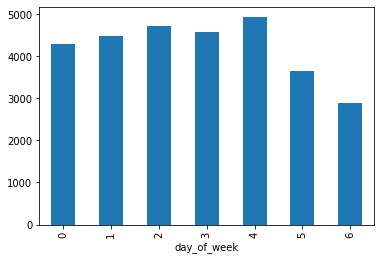

In [ ]:
df.groupby(by='day_of_week').size().plot(kind = 'bar')
plt.show()

In [ ]:
hora = []
for i in range(len(df)):
  hora.append(df.at[i,'hora'].split(':')) 
columns = list(zip(*hora))
df['hora'] = columns[0]
df['hora'] = df['hora'].astype(int) 
df

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,y,cantidad_victimas,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week
0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2,avenida,point(107881.450960282 101307.802557128),-58.377362,-34.617451,1,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1,3
1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7,calle,POINT(99434.1139023 99998.2519356),-58.469471,-34.629286,1,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1,3
2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4,avenida,point(94030.4783360778 97680.9200807321),-58.528416,-34.650157,1,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14,5
3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15,avenida,POINT(104578.721381 104043.896923),-58.413389,-34.592807,1,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1,2
4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2,avenida,point(103286.903159354 107774.354385908),-58.427485,-34.559184,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,lesiones,conductor,transporte publico,masculino,31.0,2018-05-30,18,calle,point(104512.640364535 101222.8469354),-58.414094,-34.618237,2,5.0,multiple,"""transporte publico"",automovil",automovil,5,2018,30,2
29570,lesiones,conductor,automovil,masculino,45.0,2018-05-30,13,avenida,point(93978.5438188266 99382.8717290635),-58.528970,-34.634815,1,10.0,motovehiculo - vehiculo,automovil,moto,5,2018,30,2
29571,lesiones,conductor,transporte publico,masculino,26.0,2018-05-31,20,avenida,point(107552.69037931 102796.297888782),-58.380960,-34.604036,1,1.0,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",5,2018,31,3
29572,lesiones,pasajero,automovil,femenino,32.0,2018-05-31,9,calle,point(100921.890616958 102987.043142826),-58.453249,-34.602343,2,15.0,multiple,"NULL,automovil","automovil,automovil",5,2018,31,3


In [ ]:
year_2018 = df.loc[df.year == 2018,:] 
df.drop(labels=year_2018.index, axis=0, inplace=True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,y,cantidad_victimas,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week
0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2,avenida,point(107881.450960282 101307.802557128),-58.377362,-34.617451,1,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1,3
1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7,calle,POINT(99434.1139023 99998.2519356),-58.469471,-34.629286,1,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1,3
2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4,avenida,point(94030.4783360778 97680.9200807321),-58.528416,-34.650157,1,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14,5
3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15,avenida,POINT(104578.721381 104043.896923),-58.413389,-34.592807,1,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1,2
4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2,avenida,point(103286.903159354 107774.354385908),-58.427485,-34.559184,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26134,lesiones,peaton,peaton,masculino,11.0,2017-12-12,17,calle,point(102464.785026 104303.334298),-58.436433,-34.590475,1,15.0,motovehiculo - peaton,peaton,moto,12,2017,12,1
26135,lesiones,ciclista,bicicleta,femenino,17.0,2017-12-14,16,calle,point(104370.266665253 104649.02576906),-58.415664,-34.587353,1,14.0,bicicleta - vehiculo,bicicleta,automovil,12,2017,14,3
26136,lesiones,peaton,peaton,femenino,3.0,2017-12-16,18,calle,point(108516.345434 102125.539587),-58.370447,-34.610075,1,1.0,peaton - vehiculo,peaton,taxi/remis,12,2017,16,5
26137,lesiones,peaton,peaton,masculino,5.0,2017-12-16,12,calle,point(98886.2980366 93738.9567445),-58.475454,-34.685708,1,8.0,motovehiculo - peaton,peaton,moto,12,2017,16,5


In [ ]:
#ppf.ProfileReport(df)

# Analisis


In [ ]:
df.sexo.value_counts()

masculino    17933
femenino      8206
Name: sexo, dtype: int64

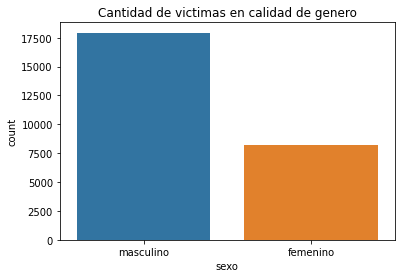

In [ ]:
plt.title('Cantidad de victimas en calidad de genero')
sns.countplot(x=df.sexo)
plt.show()

In [ ]:
df.cantidad_victimas.value_counts()

1    22971
2     2321
3      439
4      244
6       59
5       36
7       33
8       27
9        9
Name: cantidad_victimas, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

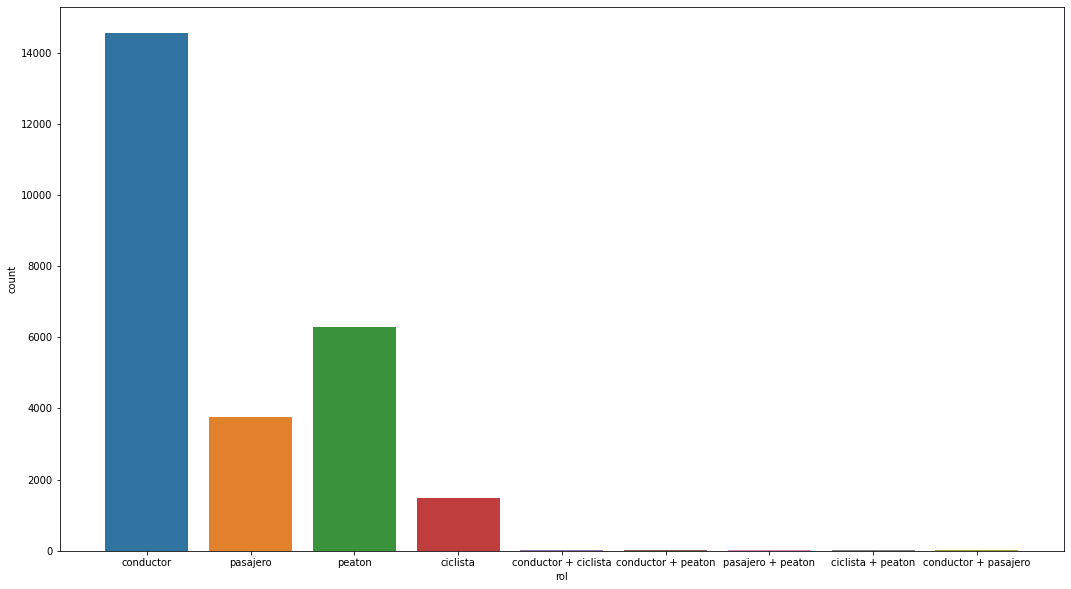

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.countplot(df.rol)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


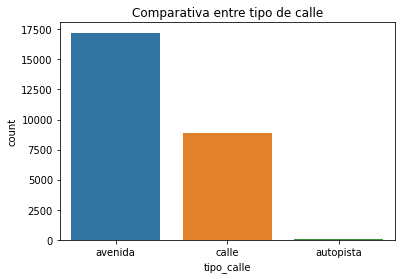

In [ ]:
plt.title('Comparativa entre tipo de calle')
sns.countplot(df.tipo_calle)

26136


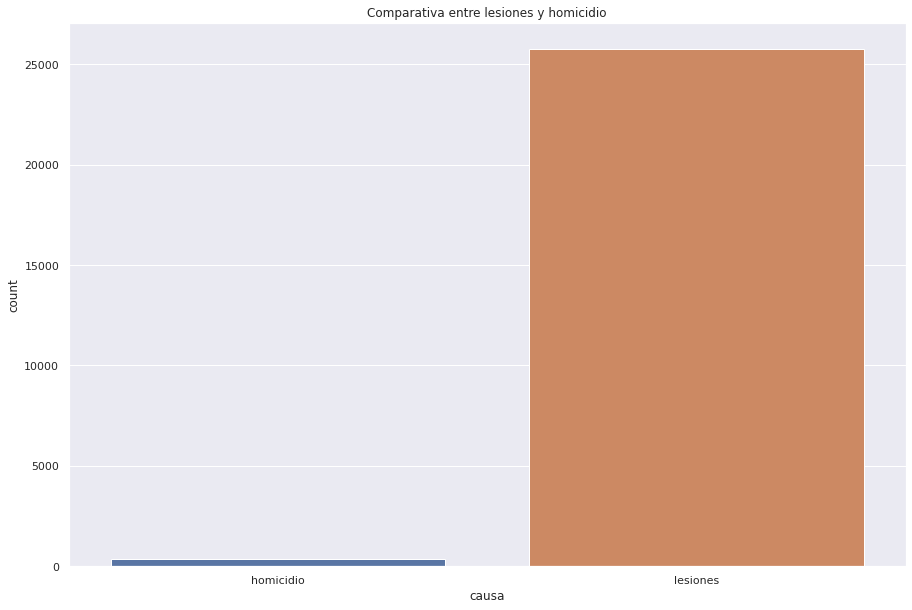

In [ ]:
plt.title('Comparativa entre lesiones y homicidio')
print(df.causa.count())
sns.countplot(data=df, x='causa')

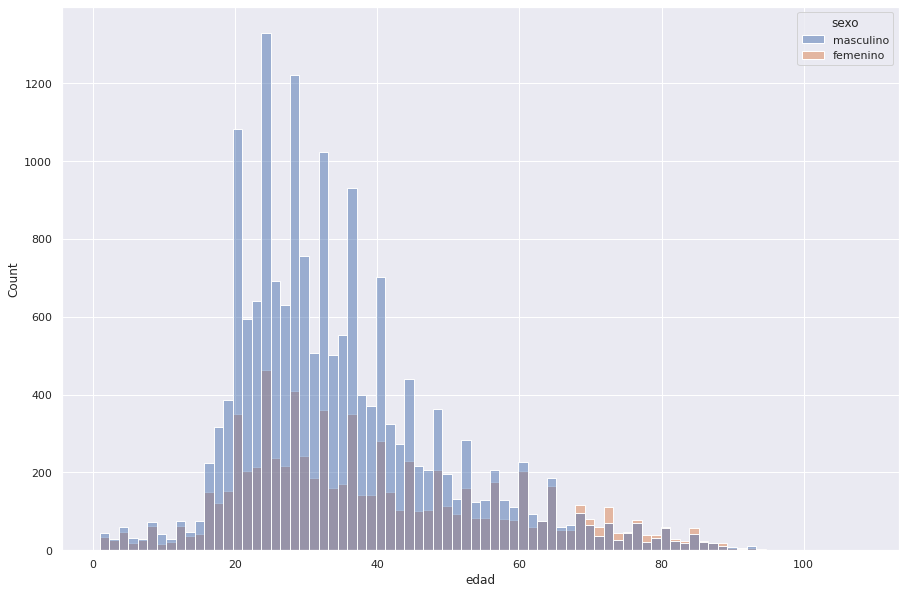

In [ ]:
sns.histplot(data=df, x='edad',  hue='sexo')

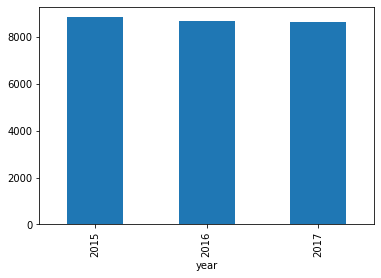

In [ ]:
df.groupby(by='year').size().plot(kind = 'bar')
plt.show()

In [ ]:
anios = df.year
print(anios.value_counts(sort=True))

2015    8830
2016    8671
2017    8638
Name: year, dtype: int64


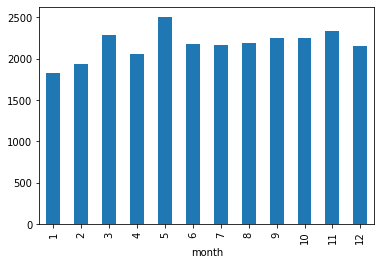

In [ ]:
df.groupby(by='month').size().plot(kind = 'bar')
plt.show()

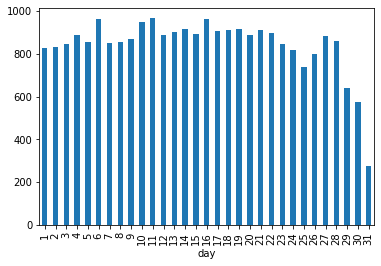

In [ ]:
df.groupby(by='day').size().plot(kind = 'bar')
plt.show()

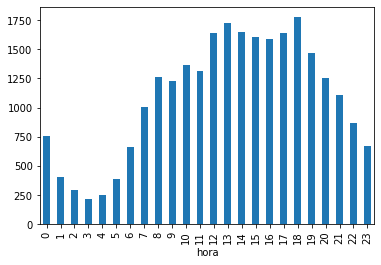

In [ ]:
df.groupby(by='hora').size().plot(kind = 'bar')
plt.show()

In [ ]:
horas = df.hora
print(horas.value_counts(sort=True))

18    1777
13    1728
14    1651
17    1637
12    1637
15    1606
16    1592
19    1464
10    1366
11    1311
8     1264
20    1257
9     1230
21    1110
7     1006
22     868
0      756
23     669
6      661
1      404
5      389
2      290
4      250
3      216
Name: hora, dtype: int64


In [ ]:
comunas = df.comuna
comunas.value_counts(sort = True)

1.0     3649
3.0     2493
15.0    2024
14.0    1995
4.0     1887
9.0     1826
11.0    1725
7.0     1647
13.0    1518
12.0    1423
10.0    1364
5.0     1351
8.0     1190
2.0     1054
6.0      990
Name: comuna, dtype: int64

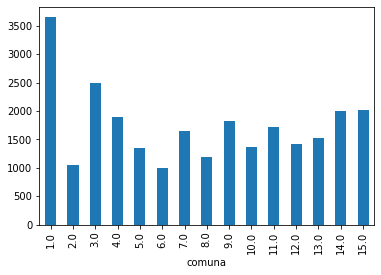

In [ ]:
df.groupby(by = 'comuna').size().plot(kind = 'bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


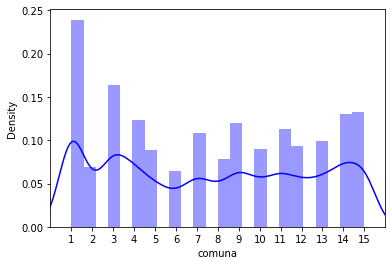

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0,16)
ax.set_xticks(range(1,16))
sns.distplot(comunas, color = "blue", ax = ax)

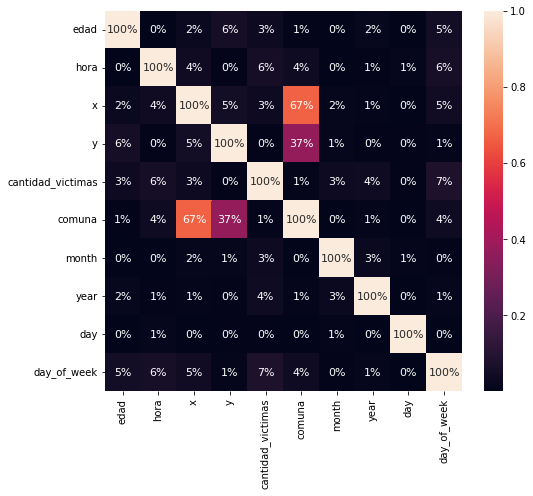

In [ ]:
#Correlación entre las variables
plt.figure(figsize=(8, 7))
sns.heatmap(abs(df.corr()), vmax = 1, annot=True, annot_kws={"size": 11}, fmt='.0%')

#### Queremos plotear la densidad de accidentes dentro de cada barrio: para eso, generamos la columna "geometry" y transformamos al dataset en un geodataset, así podremos trabajar con los puntos geográficos de cada accidente y ubicarlos dentro del mapa de CABA:

In [ ]:
from shapely.geometry import Point
geometria = gpd.points_from_xy(df.x, df.y)
df = gpd.GeoDataFrame(df, geometry = geometria)
df

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,...,cantidad_victimas,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week,geometry
0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2,avenida,point(107881.450960282 101307.802557128),-58.377362,...,1,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1,3,POINT (-58.37736 -34.61745)
1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7,calle,POINT(99434.1139023 99998.2519356),-58.469471,...,1,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1,3,POINT (-58.46947 -34.62929)
2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4,avenida,point(94030.4783360778 97680.9200807321),-58.528416,...,1,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14,5,POINT (-58.52842 -34.65016)
3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15,avenida,POINT(104578.721381 104043.896923),-58.413389,...,1,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1,2,POINT (-58.41339 -34.59281)
4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2,avenida,point(103286.903159354 107774.354385908),-58.427485,...,3,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14,4,POINT (-58.42748 -34.55918)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26134,lesiones,peaton,peaton,masculino,11.0,2017-12-12,17,calle,point(102464.785026 104303.334298),-58.436433,...,1,15.0,motovehiculo - peaton,peaton,moto,12,2017,12,1,POINT (-58.43643 -34.59048)
26135,lesiones,ciclista,bicicleta,femenino,17.0,2017-12-14,16,calle,point(104370.266665253 104649.02576906),-58.415664,...,1,14.0,bicicleta - vehiculo,bicicleta,automovil,12,2017,14,3,POINT (-58.41566 -34.58735)
26136,lesiones,peaton,peaton,femenino,3.0,2017-12-16,18,calle,point(108516.345434 102125.539587),-58.370447,...,1,1.0,peaton - vehiculo,peaton,taxi/remis,12,2017,16,5,POINT (-58.37045 -34.61007)
26137,lesiones,peaton,peaton,masculino,5.0,2017-12-16,12,calle,point(98886.2980366 93738.9567445),-58.475454,...,1,8.0,motovehiculo - peaton,peaton,moto,12,2017,16,5,POINT (-58.47545 -34.68571)


In [ ]:
df.isnull().sum()

causa                     0
rol                       0
tipo                      0
sexo                      0
edad                      0
fecha                     0
hora                      0
tipo_calle                0
geocodificacion           0
x                         0
y                         0
cantidad_victimas         0
comuna                    3
tipo_colision1            0
participantes_victimas    0
participantes_acusados    0
month                     0
year                      0
day                       0
day_of_week               0
geometry                  0
dtype: int64

In [ ]:
barrios

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06
5,"POLYGON ((-58.4306058283309 -34.6070470885963,...",CABALLITO,6.0,10990.964471,6.851029e+06
6,"POLYGON ((-58.4819203599833 -34.6242871724757,...",VILLA SANTA RITA,11.0,5757.752335,2.153691e+06
7,"POLYGON ((-58.5034920611534 -34.6240324216321,...",MONTE CASTRO,10.0,7361.036418,2.627481e+06
8,"POLYGON ((-58.525116079791 -34.613999981063,-5...",VILLA REAL,10.0,5070.965652,1.334146e+06
9,"POLYGON ((-58.4452515823782 -34.6420397134706,...",FLORES,7.0,15772.425185,8.590784e+06


In [ ]:
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads)

In [ ]:
# Convertimos el dataframe de barrios en un geodataframe:
barrios = gpd.GeoDataFrame(barrios, geometry='WKT')

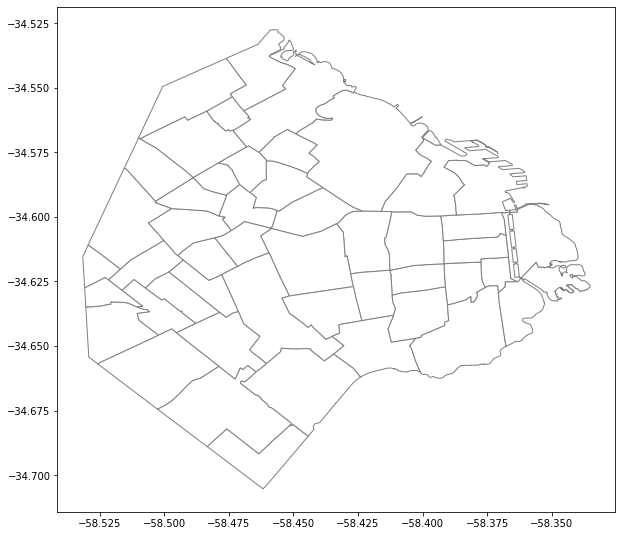

In [ ]:
# Ploteamos el mapa de CABA:
geo_barrios = gpd.GeoDataFrame(barrios, geometry ='WKT')
geo_barrios.plot(color = "white", edgecolor = "gray", figsize = (10, 10))

In [ ]:
# Individualizamos cada accidente:
accidentes = df.geometry

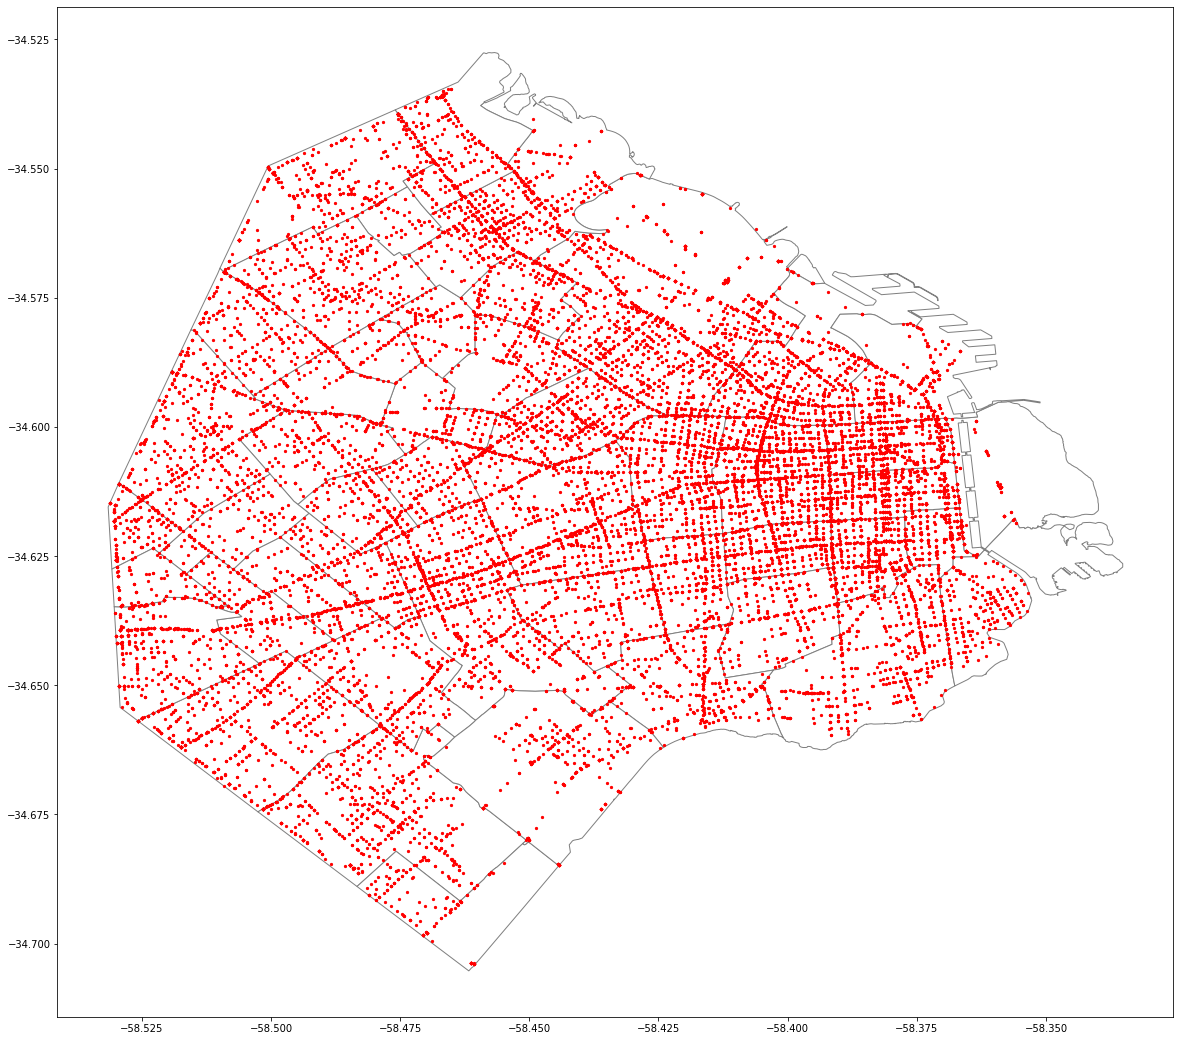

In [ ]:
# Ahora ploteamos cada accidente en el mapa:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='gray')
accidentes.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

In [ ]:
# Queremos identificar el barrio en el que ocurrió cada accidente y agregarlo como columna en el df:
barrio_0 = []
contador = 0
for i in range (len(df)):
  contador = 0
  for j in range (len(barrios)):
    if barrios.WKT[j].contains(accidentes[i]) == False:
      contador += 1
    else:
      barrio_0.append(barrios.BARRIO[j])
  if contador == len(barrios):
    barrio_0.append("vacío")

# No hay dudas de que existe una mejor manera de hacer ésto que con 2 for anidados, pero de momento lo resolví así.

In [ ]:
# Agregamos la columna de los barrios al dataset:
df["barrio"] = barrio_0

In [ ]:
# Veamos si algún punto no tiene ningún barrio asignado:
df.barrio.value_counts()

PALERMO              1995
BALVANERA            1766
FLORES               1298
RECOLETA             1054
CABALLITO             990
VILLA CRESPO          966
MONSERRAT             939
ALMAGRO               894
BELGRANO              841
CONSTITUCION          791
MATADEROS             790
SAN NICOLAS           780
VILLA DEVOTO          771
BARRACAS              757
SAN CRISTOBAL         727
VILLA LUGANO          648
RETIRO                621
SAAVEDRA              615
LINIERS               578
NUEVA POMPEYA         488
VILLA URQUIZA         466
PARQUE AVELLANEDA     458
BOEDO                 457
SAN TELMO             435
NUÑEZ                 387
PARQUE PATRICIOS      385
VILLA SOLDATI         383
CHACARITA             361
VILLA GRAL. MITRE     351
PARQUE CHACABUCO      349
VILLA SANTA RITA      329
COLEGIALES            290
VILLA PUEYRREDON      281
VILLA DEL PARQUE      274
FLORESTA              272
VELEZ SARSFIELD       261
VILLA LURO            259
BOCA                  257
VILLA REAL  

In [ ]:
# Existen 3 puntos sin barrio. Veámoslos:
sin_barrio = df.loc[df.barrio == "vacío",:]
sin_barrio

,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,x,...,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week,geometry,barrio
3674,lesiones,peaton,peaton,femenino,16.0,2016-08-24,12,avenida,POINT(105432.745531 107266.297653),-58.404100,...,NaN,motovehiculo - peaton,peaton,moto,8,2016,24,2,POINT (-58.40410 -34.56375),vacío
11089,lesiones,ciclista,bicicleta,masculino,49.0,2017-01-28,19,avenida,point(105432.745531 107266.297653),-58.404100,...,NaN,bicicleta - vehiculo,bicicleta,automovil,1,2017,28,5,POINT (-58.40410 -34.56375),vacío
22494,lesiones,conductor,automovil,masculino,57.0,2016-04-08,10,avenida,POINT(105239.570067 107489.319608),-58.406206,...,NaN,vehiculo - vehiculo,automovil,"""transporte publico""",4,2016,8,4,POINT (-58.40621 -34.56175),vacío


In [ ]:
# Vamos a droppearlos y reseteamos índices:
df.drop(labels = sin_barrio.index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

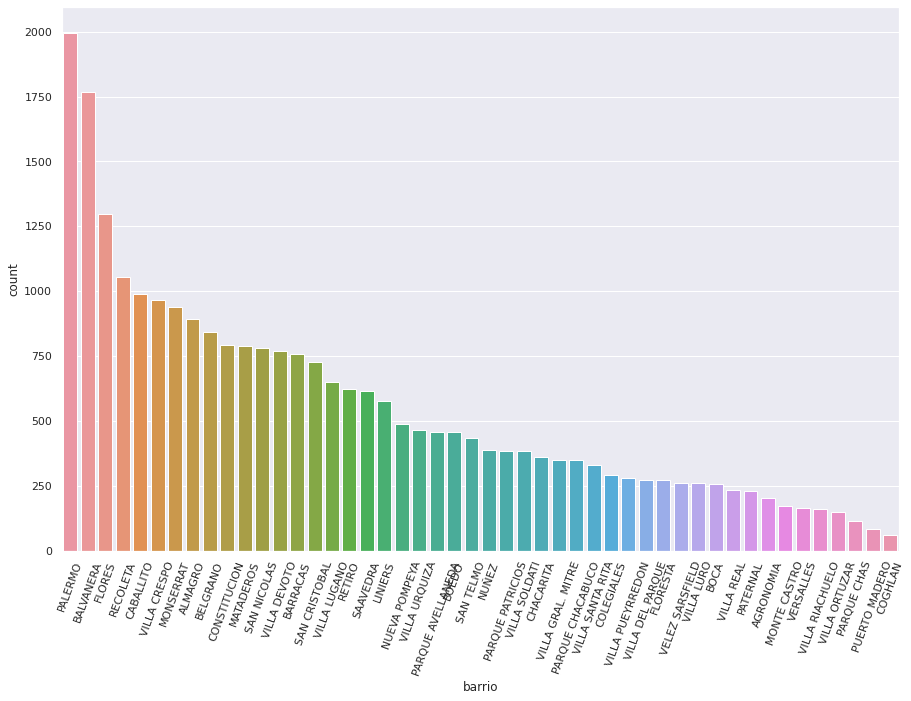

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.countplot(df.barrio, order=df.barrio.value_counts().index)
plt.xticks(rotation=70)

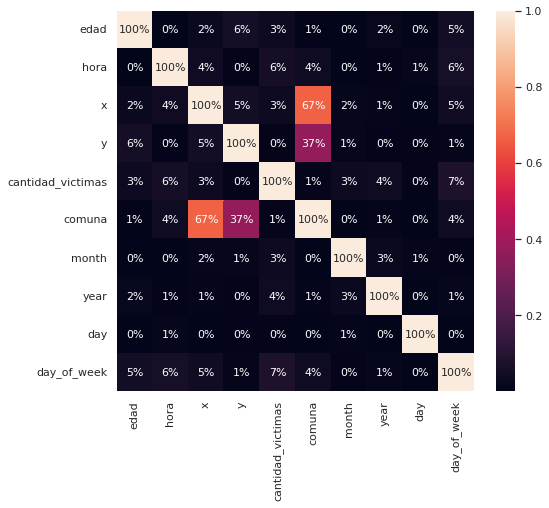

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(abs(df.corr()), vmax = 1, annot=True, annot_kws={"size": 11}, fmt='.0%')

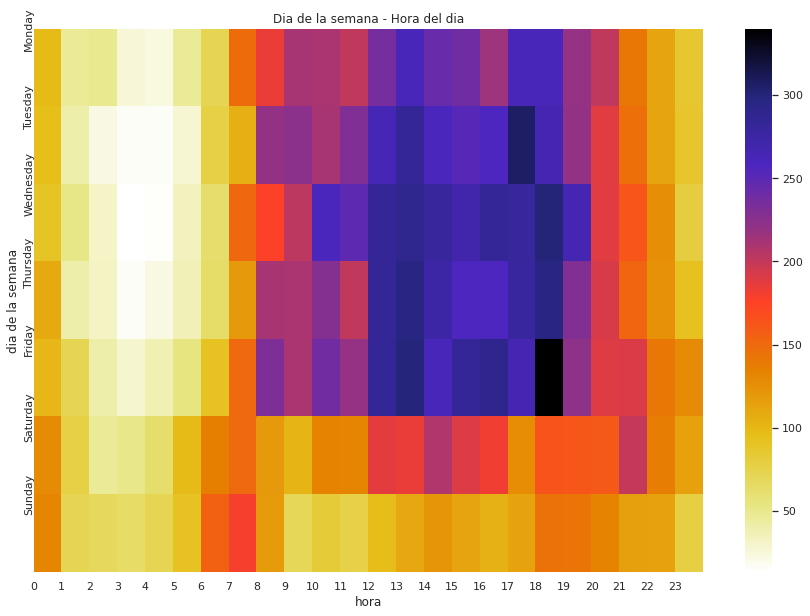

In [ ]:
dias_de_la_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped_dia_hora = df.groupby(by = ['hora','day_of_week']).size().reset_index()

dia_hora = df_grouped_dia_hora.pivot("day_of_week", "hora")
ax = sns.heatmap(dia_hora, cmap='CMRmap_r')
ax.set_title('Dia de la semana - Hora del dia')
ax.set_xlabel('hora')
ax.set_ylabel('dia de la semana')
plt.xticks(list(range(0,24)), list(range(0,24)))
plt.yticks([0,1,2,3,4,5,6], dias_de_la_semana, horizontalalignment='left')

plt.show()

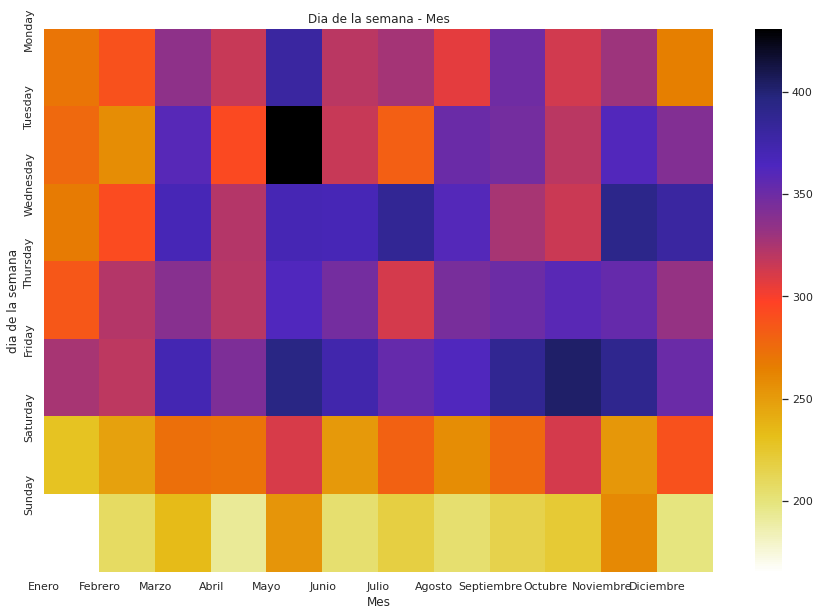

In [ ]:
meses_del_anio = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_grouped_dia_mes = df.groupby(by = ['month','day_of_week']).size().reset_index()

mes_dia = df_grouped_dia_mes.pivot("day_of_week", "month")
ax = sns.heatmap(mes_dia, cmap='CMRmap_r')
ax.set_title('Dia de la semana - Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('dia de la semana')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], meses_del_anio)
plt.yticks([0,1,2,3,4,5,6], dias_de_la_semana)
plt.show()